In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Prep behavioral data

#### Get paths - separate folders for each day/animal

In [2]:
outer_path = '/Volumes/Untitled 1/Tank Subset - DA'

outer_file_list = os.listdir(outer_path)

outer_path_list = []

for name in outer_file_list:
    int_path = outer_path + '/' + name
    outer_path_list.append(int_path)

print(len(outer_path_list))
outer_path_list[0]

28


'/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932'

In [3]:
#only need the 'TRANS_Z-scoreData' files
inner_path_list = []

for outer_path in outer_path_list:
    print(outer_path)
    inner_file_list = os.listdir(outer_path)
    for inner_file in inner_file_list:
        if inner_file.startswith('TRANS_Z-scoreData'):
            int_path = outer_path + '/' + inner_file
            inner_path_list.append(int_path)
            
print(len(inner_path_list))
inner_path_list[0]

/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932
/Volumes/Untitled 1/Tank Subset - DA/1154-210512-090438
/Volumes/Untitled 1/Tank Subset - DA/1154-210513-090559
/Volumes/Untitled 1/Tank Subset - DA/1154-210514-090414
/Volumes/Untitled 1/Tank Subset - DA/1154-210517-101242
/Volumes/Untitled 1/Tank Subset - DA/1154-210518-090544
/Volumes/Untitled 1/Tank Subset - DA/1154-210519-090122
/Volumes/Untitled 1/Tank Subset - DA/1158-210511-122305
/Volumes/Untitled 1/Tank Subset - DA/1158-210512-121924
/Volumes/Untitled 1/Tank Subset - DA/1158-210513-121916
/Volumes/Untitled 1/Tank Subset - DA/1158-210514-121546
/Volumes/Untitled 1/Tank Subset - DA/1158-210517-141208
/Volumes/Untitled 1/Tank Subset - DA/1158-210518-121808
/Volumes/Untitled 1/Tank Subset - DA/1158-210519-121610
/Volumes/Untitled 1/Tank Subset - DA/1160-210511-135839
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706
/Volumes/Untitled 1/Tank Subset - DA/1160-210513-135812
/Volumes/Untitled 1/Tank Subset - DA/1160-210514

'/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#0.txt'

In [42]:
data = pd.DataFrame()
i=0
for path in inner_path_list:
    print(path)
    print(i)
    i+=1
    
    data_int = pd.read_table(path).reset_index().dropna(axis=1)
    data_int = pd.DataFrame(data = data_int)
    data_int_mean = pd.DataFrame(data=data_int.mean(axis=1), columns=['signal']).reset_index()
    data_int_mean['file_name'] = path.split('/')[-1]
    data_int_mean['task'] = path.split('/')[-3].split('-')[-1]
    data_int_mean['bit'] = path.split('/')[-1].split('_')[-1].split('.')[0][-1]
    data_int_mean['animal'] = path.split('/')[-2].split('-')[0]
    data_int_mean['date'] = path.split('/')[-2].split('-')[1]
    print(data_int_mean.shape)
    
    if data.shape[0] == 0:
        data = data_int_mean
    else:
        data = pd.concat([data, data_int_mean], axis=0) 
        
    print(data.shape)
        
print(data.shape)
data.head()

/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#0.txt
0
(3052, 7)
(3052, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#2.txt
1
(3052, 7)
(6104, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#5.txt
2
(3052, 7)
(9156, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#6.txt
3
(3052, 7)
(12208, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210511-090932/TRANS_Z-scoreData_Box7_Bit#7.txt
4
(3052, 7)
(15260, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210512-090438/TRANS_Z-scoreData_Box7_Bit#0.txt
5
(3052, 7)
(18312, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210512-090438/TRANS_Z-scoreData_Box7_Bit#2.txt
6
(3052, 7)
(21364, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210512-090438/TRANS_Z-scoreData_Box7_Bit#5.txt
7
(3052, 7)
(24416, 7)
/Volumes/Untitled 1/Tank Subset - DA/1154-210512-090438/TRANS_Z-scoreData_Box7_Bit#6.txt
8
(3052, 7)
(27468

(3052, 7)
(225848, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210511-135839/TRANS_Z-scoreData_Box7_Bit#7.txt
74
(3052, 7)
(228900, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706/TRANS_Z-scoreData_Box7_Bit#0.txt
75
(3052, 7)
(231952, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706/TRANS_Z-scoreData_Box7_Bit#2.txt
76
(3052, 7)
(235004, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706/TRANS_Z-scoreData_Box7_Bit#5.txt
77
(3052, 7)
(238056, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706/TRANS_Z-scoreData_Box7_Bit#6.txt
78
(3052, 7)
(241108, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210512-135706/TRANS_Z-scoreData_Box7_Bit#7.txt
79
(3052, 7)
(244160, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210513-135812/TRANS_Z-scoreData_Box7_Bit#0.txt
80
(3052, 7)
(247212, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210513-135812/TRANS_Z-scoreData_Box7_Bit#2.txt
81
(3052, 7)
(250264, 7)
/Volumes/Untitled 1/Tank Subset - DA/1160-210513-135812/TRANS_Z-sc

,index,signal,file_name,task,bit,animal,date
0,0,0.131014,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511
1,1,0.133106,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511
2,2,0.129382,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511
3,3,0.118902,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511
4,4,0.104986,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511


#### Map bits

In [43]:
bit_map ={'0':'lever_out',
          '1':'head_entry',
          '2':'reward',
          '3':'rt_press',
          '4':'lt_press',
          '5':'reward_HE',
          '6':'correct_alt',
          '7':'incorrect_alt'}

data['bit_str'] = data['bit'].map(bit_map)
data.head(1)

,index,signal,file_name,task,bit,animal,date,bit_str
0,0,0.131014,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out


#### Combine with meta

In [44]:
path_meta = '/Users/abbieschindler/Documents/Schindler_Lab/Data/FP/trial/meta.csv'

meta = pd.read_csv(path_meta)
meta = pd.DataFrame(data = meta)
meta['animal'] = meta['animal'].astype('str')
print(meta.shape)
meta.head()

(12, 3)


,animal,group,round
0,1153,1,NaN
1,1154,1,2.0
2,1155,2,NaN
3,1157,2,NaN
4,1158,2,2.0


In [47]:
data_final = data.merge(meta, on=['animal'])
print(data_final.shape)
data_final = data_final
data_final.head()

(427280, 10)


,index,signal,file_name,task,bit,animal,date,bit_str,group,round
0,0,0.131014,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out,1,2.0
1,1,0.133106,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out,1,2.0
2,2,0.129382,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out,1,2.0
3,3,0.118902,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out,1,2.0
4,4,0.104986,TRANS_Z-scoreData_Box7_Bit#0.txt,DA,0,1154,210511,lever_out,1,2.0


In [49]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427280 entries, 0 to 427279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      427280 non-null  int64  
 1   signal     427280 non-null  float64
 2   file_name  427280 non-null  object 
 3   task       427280 non-null  object 
 4   bit        427280 non-null  object 
 5   animal     427280 non-null  object 
 6   date       427280 non-null  object 
 7   bit_str    427280 non-null  object 
 8   group      427280 non-null  int64  
 9   round      427280 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 35.9+ MB


lever_out


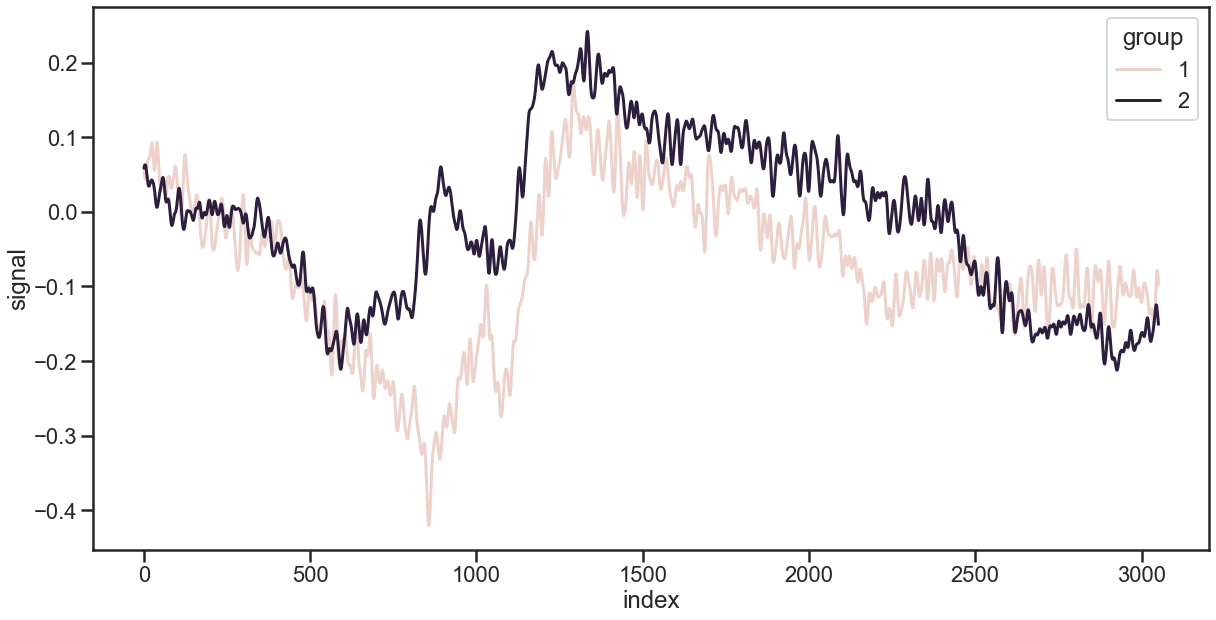

reward


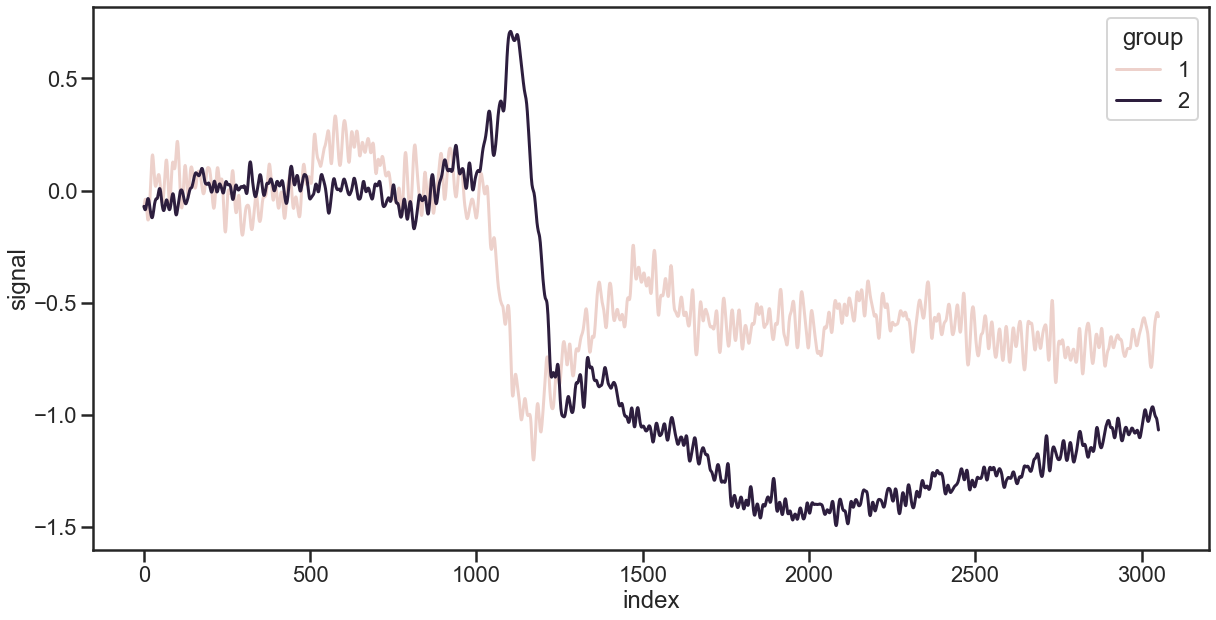

reward_HE


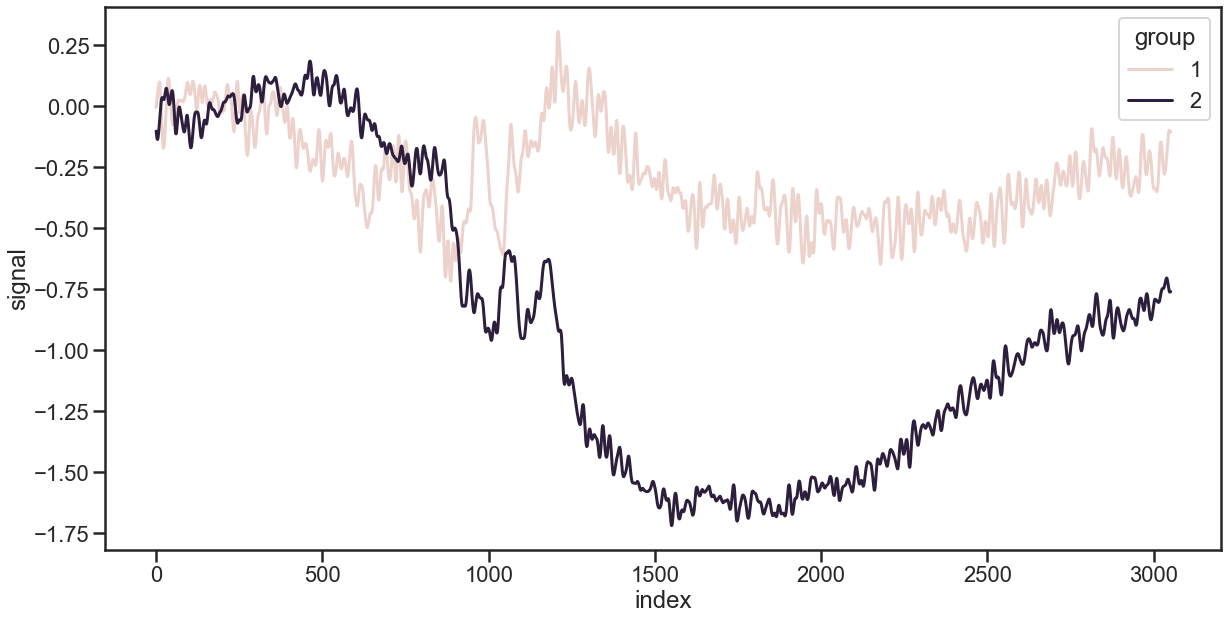

correct_alt


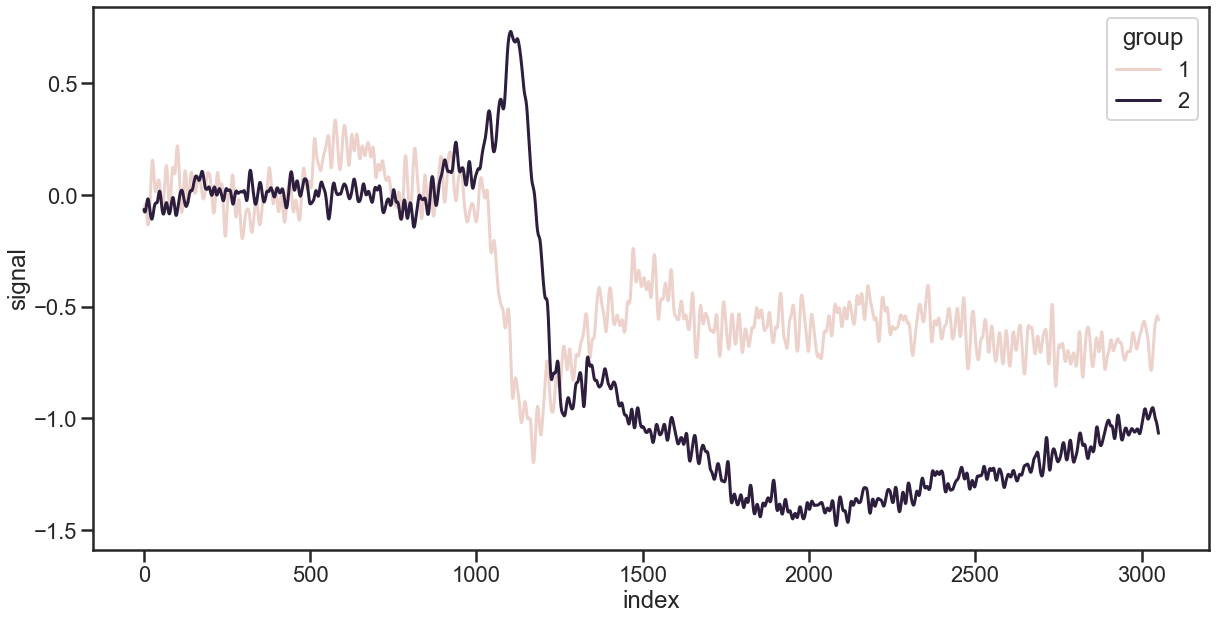

incorrect_alt


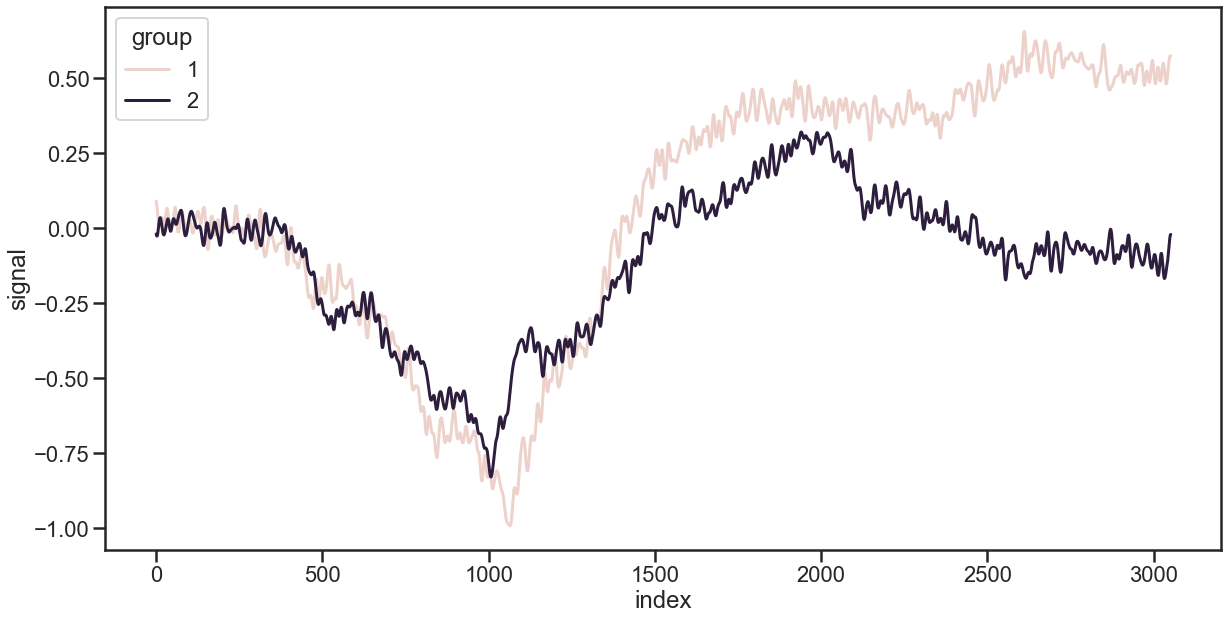

In [50]:
for bit in data_final['bit_str'].unique():
    print(bit)
    data_int = data_final[data_final['bit_str']==bit]
    
    plt.figure(figsize=(20,10))
    sns.lineplot(x='index', y='signal', data=data_int, hue='group', ci=None)
    plt.show()